In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("MLM_vordlus.csv")

In [3]:
data

,Mudel,Train_kadu,Val_kadu,Accuracy_lemma,Accuracy_vorm,Epohh
0,100K,4.916,4.925,0.359,0.606,epohh-1
1,100K,4.702,4.793,0.370,0.628,epohh-2
2,100K,4.734,4.741,0.375,0.600,epohh-3
3,100K,NaN,NaN,0.372,0.607,test
4,200K,4.603,4.583,0.398,0.626,epohh-1
5,200K,4.487,4.380,0.405,0.640,epohh-2
6,200K,4.429,4.431,0.408,0.629,epohh-3
7,200K,NaN,NaN,0.402,0.635,test
8,300K,4.534,4.450,0.402,0.636,epohh-1
9,300K,4.408,4.247,0.416,0.643,epohh-2


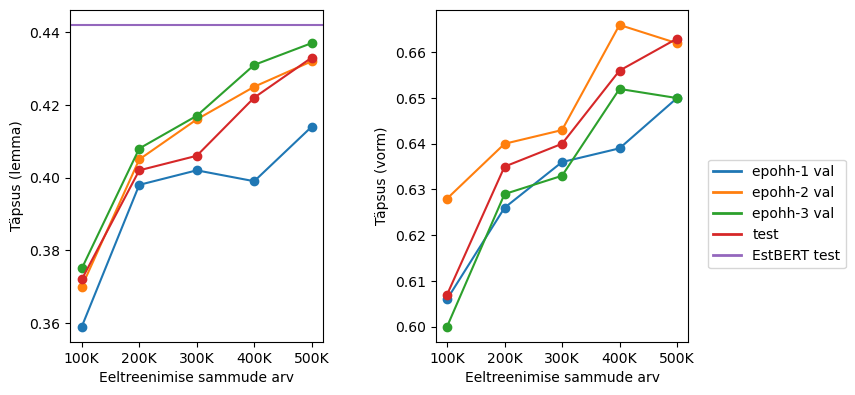

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.Accuracy_lemma, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax1.axhline(y=float(estbert_data.Accuracy_lemma), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (lemma)")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Accuracy_vorm, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax2.axhline(y=float(estbert_data.Accuracy_vorm), color='tab:purple', label = "EstBERT test")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (vorm)")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['epohh-1 val', 'epohh-2 val', 'epohh-3 val', 'test', 'EstBERT test']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))

#plt.savefig('MLM_kohandamine.JPG')
plt.show()

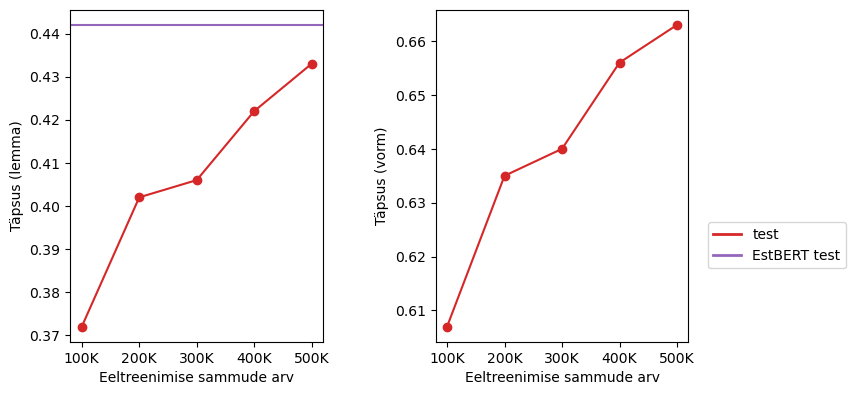

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:red', 'tab:purple']

data2 = data[data.Epohh == "test"]

for i, epohh in enumerate(data2.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.Accuracy_lemma, label = epohh, marker='o', c = colors[i])

estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
ax1.axhline(y=float(estbert_data.Accuracy_lemma), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (lemma)")

for i, epohh in enumerate(data2.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Accuracy_vorm, label = epohh, marker='o', c = colors[i])

estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
ax2.axhline(y=float(estbert_data.Accuracy_vorm), color='tab:purple', label = "EstBERT test")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (vorm)")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['test', 'EstBERT test']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))


#plt.savefig('MLM_kohandamine.JPG')
plt.show()

In [14]:
data2 = data[data.Epohh == "test"].reset_index(drop = True)

X = list(range(200000, 600000, 100000))
Y = list(data2.Accuracy_lemma)[1:]

a, b = np.polyfit(X, Y, 1)

Y2 = list(data2.Accuracy_vorm)[1:]

a2, b2 = np.polyfit(X, Y2, 1)

for i in list(range(600000, 1600000, 100000)):
    data2.loc[len(data2)] = [str(int(i/1000)) + "K", "","" , a*i + b, a2*i + b2, "test"]

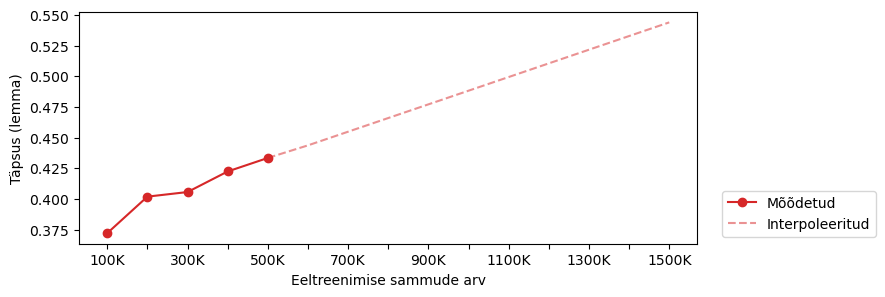

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.tight_layout(pad=5.0)


epohh_data = data2[(data2.Mudel.isin(["100K", "200K", "300K", "400K", "500K"]))]
ax.plot(epohh_data.Mudel, epohh_data.Accuracy_lemma, marker='o', label = "Mõõdetud", color = "#d62728")
    
epohh_data = data2[(~data2.Mudel.isin(["100K", "200K", "300K", "400K", "EstBERT"]))]
ax.plot(epohh_data.Mudel, epohh_data.Accuracy_lemma, label = "Interpoleeritud", linestyle='--', color = "#d62728", alpha = 0.5)

#estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
#ax.axhline(y=float(estbert_data.F1), color='gray', linestyle='--', label = "EstBERT")

ax.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (lemma)")

ax.legend(loc = "lower right", bbox_to_anchor = (1.3, 0))

plt.setp(ax.get_xticklabels()[1::2], visible=False)

plt.show()

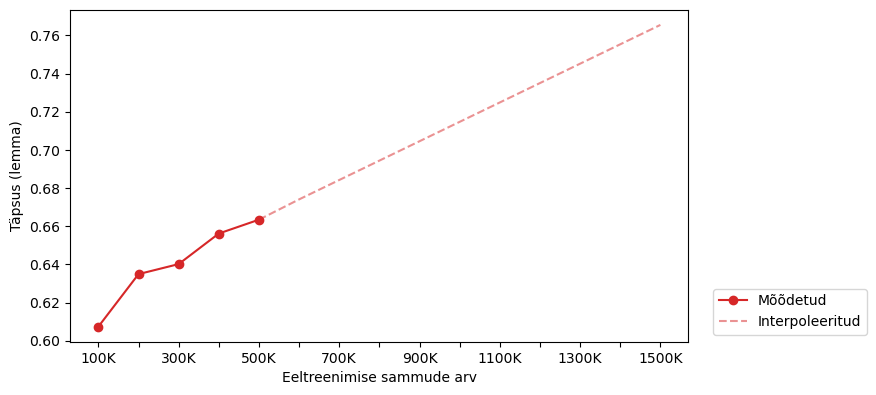

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
fig.tight_layout(pad=5.0)


epohh_data = data2[(data2.Mudel.isin(["100K", "200K", "300K", "400K", "500K"]))]
ax.plot(epohh_data.Mudel, epohh_data.Accuracy_vorm, marker='o', label = "Mõõdetud", color = "#d62728")
    
epohh_data = data2[(~data2.Mudel.isin(["100K", "200K", "300K", "400K", "EstBERT"]))]
ax.plot(epohh_data.Mudel, epohh_data.Accuracy_vorm, label = "Interpoleeritud", linestyle='--', color = "#d62728", alpha = 0.5)

#estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
#ax.axhline(y=float(estbert_data.F1), color='gray', linestyle='--', label = "EstBERT")

ax.set(xlabel="Eeltreenimise sammude arv", ylabel="Täpsus (lemma)")

ax.legend(loc = "lower right", bbox_to_anchor = (1.3, 0))

plt.setp(ax.get_xticklabels()[1::2], visible=False)

plt.show()